# Model Development





<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h4>Setup</h4>


 Import libraries:


In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [5]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


In [6]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [7]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [9]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction:


In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]   

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>





<b>Create a linear regression object called "lm1".</b>
</div>


In [ ]:
lm1 = LinearRegression()
lm1



<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>
</div>


In [ ]:
lm1.fit(df[['engine-size']],df[['price']])
lm1



<b>Find the slope and intercept of the model.</b>
</div>


<h4>Slope</h4>


In [ ]:
lm1.coef_

<h4>Intercept</h4>


In [ ]:
lm1.intercept_

</h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>
</div>


In [ ]:
Yhat = -7963.34 + 166.86*X
Price = -7963.34 + 166.86*df['engine-size']

<h4>Multiple Linear Regression</h4>


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [ ]:
lm.fit(Z, df['price'])

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>



Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

 </h1>
<b>Find the coefficient of the model.</b>
</div>


In [ ]:
lm2.coef_

<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the visualization package, seaborn:


In [26]:
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


 Let's visualize **highway-mpg** as potential predictor variable of price:


In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

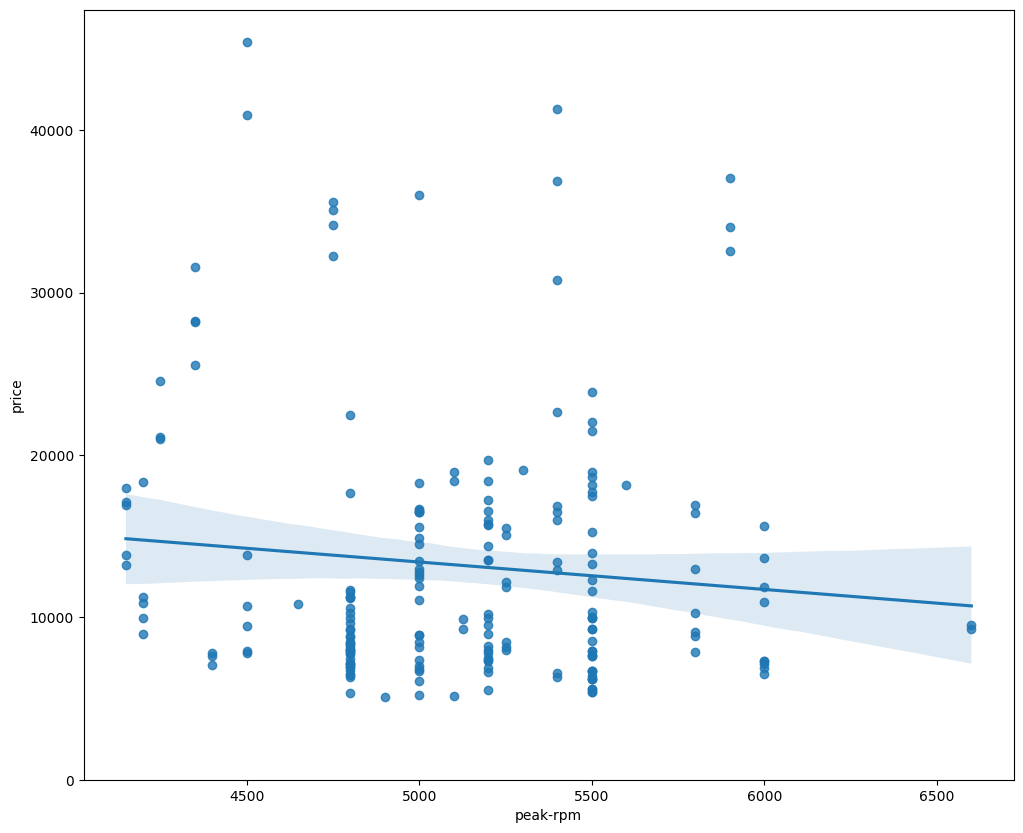

In [28]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [29]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>



In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


First, let's make a prediction:


In [ ]:
Y_hat = lm.predict(Z)

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p>We will use the following function to plot the data:</p>


In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:

In [ ]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

 Let's plot the function:


In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [ ]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

We can perform a polynomial transform on multiple features. First, we import the module:


In [43]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2: 


In [44]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [45]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [46]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [47]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [49]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [51]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [53]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [ ]:
Input = [('scale', StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]


<h2>4. Measures for In-Sample Evaluation</h2>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [56]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [57]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [58]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [59]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [60]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


We produce a prediction:


In [61]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [62]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


In [63]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [64]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:  


In [65]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>


In [66]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [67]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model:


In [68]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [70]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can plot the data:


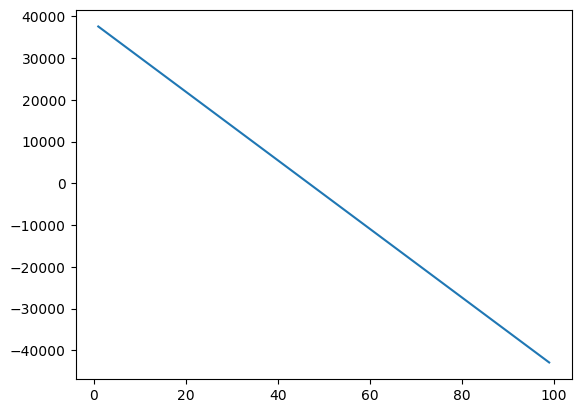

In [71]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>
